### Regularized Linear Regression (정규화된 선형 회귀)

- 다중 회귀 모델은 복잡도가 높아서 과대적합(overfitting)되는 경향이 있다. 이를 해결하기 위해서는 규제(penalty)를 주어 복잡도를 감소시켜야 한다.

#### 라쏘(LASSO, Least Absolute Shrinkage and Selection Operator)
- L1 규제를 통한 정규화를 사용하는 방식이다.
- 규제항이 0에 수렴할 때 L1 정규화에서는 가중치(W)가 0이 될 수 있다.
- L1 NORM의 경우에 절대값에 대한 식이므로 미분이 불가능한 점이 있지만, 특정 방식을 통해 미분하면 가중치가 0이 된다.  
  따라서 경사하강법을 통해 학습하는 모델에는 적합하지 않다.
- 중요하지 않은 feature들은 모델에서 제외하여 모델을 단순하게 만들고, 가장 영향력이 큰 특성이 무엇인지 알 수 있기 때문에 모델의 해석력이 좋아진다.

<div style="display: flex; margin-top:20px">
    <div>
        <img src="./images/regularized01.png" width="350" style="margin-left: 30px">
    </div>
    <div>
        <img src="./images/regularized02.png" style="margin-left: 50px">
    </div>
</div>

#### 릿지 (Ridge)
- L2 규제를 통한 정규화를 사용하는 방식이다.
- 규제항이 0에 수렴할 때 L2 정규화의 경우 가중치는 0이 될 수 없다.
- L2 NORM의 경우 미분했을 때 가중치가 남아있기 때문에, 경사하강법을 통해 학습하는 모델에 적합하다.
- 값이 0이 되어 제외되는 feature가 없지만, 골고루 0에 가까운 값으로 작아지기 때문에 장기적으로 더 좋은 모델이 된다.

<div style="display: flex; margin-top:20px">
    <div>
        <img src="./images/regularized03.png" width="350" style="margin-left: 30px">
    </div>
    <div>
        <img src="./images/regularized04.png" style="margin-left: 50px">
    </div>
</div>

**λ (Regulation parameter)**
- 수학적으로는 람다라고 함.
- λ이 커지면 loss function을 최소화하는 과정에서 NORM이 작아지므로 규제가 강해졌다고 표현한다.
- λ이 작아지면 loss function을 최소화하는 과정에서 NORM이 커지므로 규제가 약해졌다고 표현한다.

##### 한국인 수익 예측
- id : 식별 번호
- year : 조사 년도
- wave : 2005년 wave 1위부터 2018년 wave 14위까지
- region: 1)서울 2)경기 3)경남 4)경북 5)충남 6)강원 & 충북 7)전라 & 제주
- income: 연간 수입 M원(백만원.1100원=1USD)
- family_member: 가족 구성원 수
- gender: 1) 남성 2) 여성
- year_born: 태어난 년도
- education_level:1)무교육(7세 미만) 2)무교육(7세 이상) 3)초등학교 4)중학교 5)고등학교 6)대학 학위 8)MA 9)박사 학위
- marriage: 혼인상태. 1)해당없음(18세 미만) 2)혼인중 3)사망으로 별거중 4)별거중 5)미혼 6)기타
- religion: 1) 종교 있음 2) 종교 없음  
- occupation: 직종 코드, 별도 첨부
- company_size: 기업 규모
- reason_none_worker: 1)능력 없음 2)군 복무 중 3)학교에서 공부 중 4)학교 준비 5)직장인 7)집에서 돌보는 아이들 8)간호 9)경제 활동 포기 10)일할 의사 없음 11)기타

In [1]:
import pandas as pd

# 데이터 호출
i_df = pd.read_csv('./datasets/korean_income.csv', low_memory=False)
i_df

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker
0,10101,2005,1,1,614.0,1,2,1936,2,2,2,,,8
1,10101,2011,7,1,896.0,1,2,1936,2,2,2,,,10
2,10101,2012,8,1,1310.0,1,2,1936,2,2,2,,,10
3,10101,2013,9,1,2208.0,1,2,1936,2,2,2,,,1
4,10101,2014,10,1,864.0,1,2,1936,2,2,2,,,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92852,98000701,2014,10,5,11600.0,6,1,1967,5,1,1,874,1,
92853,98000701,2015,11,5,8327.0,6,1,1967,5,1,1,874,1,
92854,98000701,2016,12,5,7931.0,6,1,1967,5,1,1,874,1,
92855,98000701,2017,13,5,8802.0,5,1,1967,5,1,1,874,1,


#### 📊 데이터 정보

In [2]:
# 데이터 세트 정보 확인
i_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92857 entries, 0 to 92856
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  92857 non-null  int64  
 1   year                92857 non-null  int64  
 2   wave                92857 non-null  int64  
 3   region              92857 non-null  int64  
 4   income              92857 non-null  float64
 5   family_member       92857 non-null  int64  
 6   gender              92857 non-null  int64  
 7   year_born           92857 non-null  int64  
 8   education_level     92857 non-null  int64  
 9   marriage            92857 non-null  int64  
 10  religion            92857 non-null  int64  
 11  occupation          92857 non-null  object 
 12  company_size        92857 non-null  object 
 13  reason_none_worker  92857 non-null  object 
dtypes: float64(1), int64(10), object(3)
memory usage: 9.9+ MB


In [3]:
i_df.occupation.value_counts()

occupation
        33643
611     10079
941      2800
873      2595
312      2211
        ...  
1009        2
113         1
12          1
828         1
122         1
Name: count, Length: 244, dtype: int64

#### 📊 전처리

In [4]:
# 직종 코드가 없는 데이터 확인
i_df[i_df.occupation == ' ']

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker
0,10101,2005,1,1,614.0,1,2,1936,2,2,2,,,8
1,10101,2011,7,1,896.0,1,2,1936,2,2,2,,,10
2,10101,2012,8,1,1310.0,1,2,1936,2,2,2,,,10
3,10101,2013,9,1,2208.0,1,2,1936,2,2,2,,,1
4,10101,2014,10,1,864.0,1,2,1936,2,2,2,,,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92843,97990701,2012,8,6,1591.0,2,1,1932,2,1,2,,,1
92845,97990701,2014,10,6,1612.0,2,1,1932,2,1,2,,,10
92846,97990701,2015,11,6,1899.0,2,1,1932,2,1,2,,,10
92847,97990701,2016,12,6,1770.3,2,1,1932,2,1,2,,,10


In [5]:
# 데이터 프레임 복제
pre_i_df = i_df.copy()

# 백수인 사람은 직업 코드가 없기 때문에 0으로 임의 설정
pre_i_df.loc[:, 'occupation'] = i_df.occupation.apply(lambda x: x.replace(' ', '0'))

#### ❗ 이슈
<code>i_df.loc[:, 'occupation'] = i_df.occupation.apply(lambda x: x.replace(' ', 0))</code>  
replace() argument 2 must be str, not int

#### 💡 해결
- 현재 occupation이 object 형식이라 int 문자열로 변경이 불가하므로, 0을 문자열로 입력해주기

In [6]:
import numpy as np

# 정수로 형변환
pre_i_df.occupation = pre_i_df.occupation.astype(np.int16)

#### ❗ 이슈
<code>i_df.occupation.astype(np.int16)</code>  
invalid literal for int() with base 10: ' '

#### 💡 해결
- object를 int16으로 변환하려고 했더니 공백이 있어 변환이 불가능하다고 함.
- 공백이 왜 있는지 reason_none_worker 피처에서 백수인지 확인 후 백수인 사람들은 0인 직업 코드를 임의로 설정하여 변환해줘야 함.
- 해당 코드는 위에서 먼저 진행해야 함.

In [7]:
# # 직종 코드가 0(백수)인 데이터 따로 저장
# pre_i_0_df = pre_i_df[pre_i_df.occupation == 0]
# pre_i_0_df

In [8]:
# # 이상치 제거(직종 코드에 없는 번호 제거)
# pre_i_df.drop(index=pre_i_df[~pre_i_df.occupation.between(11, 1012)].index, axis=0)

In [9]:
# # 정상 직종코드 및 0 데이터 합치기
# pd.concat([pre_i_df, pre_i_0_df], axis=0)

In [10]:
# # 인덱스 번호 초기화
# pre_i_df.reset_index(drop=True, inplace=True)

In [11]:
pre_i_df

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker
0,10101,2005,1,1,614.0,1,2,1936,2,2,2,0,,8
1,10101,2011,7,1,896.0,1,2,1936,2,2,2,0,,10
2,10101,2012,8,1,1310.0,1,2,1936,2,2,2,0,,10
3,10101,2013,9,1,2208.0,1,2,1936,2,2,2,0,,1
4,10101,2014,10,1,864.0,1,2,1936,2,2,2,0,,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92852,98000701,2014,10,5,11600.0,6,1,1967,5,1,1,874,1,
92853,98000701,2015,11,5,8327.0,6,1,1967,5,1,1,874,1,
92854,98000701,2016,12,5,7931.0,6,1,1967,5,1,1,874,1,
92855,98000701,2017,13,5,8802.0,5,1,1967,5,1,1,874,1,


In [12]:
# 직종 코드 데이터 세트 호출
j_df = pd.read_csv('./datasets/korean_job_code.csv')
j_df

,job_code,job_title,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,백수,NaN,NaN,NaN
1,11,Senior public and corporate positions,NaN,NaN,NaN
2,111,Assembly members,senior public officials and executives of pub...,NaN,NaN
3,112,senior corporate executive,NaN,NaN,NaN
4,12,Administrative and management support manageri...,NaN,NaN,NaN
...,...,...,...,...,...
196,991,Simple workers related to agriculture,forestry and fishing,NaN,NaN
197,992,Employees related to meter reading,collection and parking,NaN,NaN
198,999,Other service related simple employees,NaN,NaN,NaN
199,1011,Military officer,NaN,NaN,NaN


In [13]:
# 직동 코드 확인
j_df.loc[:, 'job_code']

0         0
1        11
2       111
3       112
4        12
       ... 
196     991
197     992
198     999
199    1011
200    1012
Name: job_code, Length: 201, dtype: int64

In [14]:
# 직종 코드에 없는 데이터 제거 후 인덱스 초기화
pre_i_df = pre_i_df[pre_i_df.occupation.isin(j_df.loc[:, 'job_code'].values)].reset_index(drop=True)
pre_i_df

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker
0,10101,2005,1,1,614.0,1,2,1936,2,2,2,0,,8
1,10101,2011,7,1,896.0,1,2,1936,2,2,2,0,,10
2,10101,2012,8,1,1310.0,1,2,1936,2,2,2,0,,10
3,10101,2013,9,1,2208.0,1,2,1936,2,2,2,0,,1
4,10101,2014,10,1,864.0,1,2,1936,2,2,2,0,,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86887,98000701,2014,10,5,11600.0,6,1,1967,5,1,1,874,1,
86888,98000701,2015,11,5,8327.0,6,1,1967,5,1,1,874,1,
86889,98000701,2016,12,5,7931.0,6,1,1967,5,1,1,874,1,
86890,98000701,2017,13,5,8802.0,5,1,1967,5,1,1,874,1,


In [15]:
pre_i_df.company_size.value_counts()

company_size
      33642
1     25193
10     6430
3      5849
2      4974
7      3209
4      2417
5      1693
6      1241
9      1030
8       958
11      250
99        6
Name: count, dtype: int64

In [16]:
# 기업 규모가 99인 데이터 확인
pre_i_df[pre_i_df.company_size == '99']

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker
1909,2050101,2005,1,1,600.0,2,1,1942,2,1,1,0,99,9
4446,4640101,2005,1,1,5300.0,2,1,1968,5,1,2,843,99,
9870,10470101,2008,4,1,3227.0,5,1,1970,5,1,2,753,99,
34049,34220101,2005,1,2,3665.0,4,1,1963,4,1,2,842,99,
41946,42660101,2005,1,2,12240.0,5,1,1957,8,1,9,751,99,
45064,45470101,2005,1,6,5556.0,2,1,1977,7,1,2,311,99,


In [17]:
# 기업 규모가 공백인 데이터 담기
test_df = pre_i_df[pre_i_df.company_size == ' ']
# 기업 규모가 공백이고 직종 코드가 0(무직)이 아닌 데이터 확인
# 없으면 공백은 모두 무직이므로 0(없음)으로 변경
test_df[test_df.occupation != 0]

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker


In [18]:
# 회사 규모가 공백인 값을 0으로 변경
pre_i_df.loc[:, 'company_size'] = pre_i_df.company_size.apply(lambda x: x.replace(' ', '0'))
# 회사 규모가 99인 데이터 제거
pre_i_df = pre_i_df.drop(index=pre_i_df[pre_i_df.company_size == '99'].index, axis=0)

In [19]:
# 회사 규모 정수로 형변환
pre_i_df.company_size = pre_i_df.company_size.astype(np.int16)
pre_i_df.company_size.value_counts()

company_size
0     33642
1     25193
10     6430
3      5849
2      4974
7      3209
4      2417
5      1693
6      1241
9      1030
8       958
11      250
Name: count, dtype: int64

In [20]:
pre_i_df.reason_none_worker.value_counts()

reason_none_worker
      54740
10    19091
8      4275
9      2685
1      2499
7      1119
6      1074
4       704
5       326
11      237
99       76
3        52
2         7
0         1
Name: count, dtype: int64

In [21]:
# 일을 안 하는 이유가 공백인 데이터 담기
test_df = pre_i_df[pre_i_df.reason_none_worker == ' ']
# 일을 안 하는 이유가 공백이고 직종 코드가 0(무직)인 데이터 개수 확인
(test_df.occupation == 0).sum()

1496

In [22]:
pre_i_df.loc[test_df[test_df.occupation == 0].index, 'reason_none_worker'] = 11

In [23]:
test_df[test_df.occupation == 0].index

Index([   30,    86,   100,   116,   117,   118,   119,   120,   121,   122,
       ...
       86015, 86211, 86212, 86216, 86342, 86570, 86591, 86724, 86780, 86823],
      dtype='int64', length=1496)

In [24]:
print((pre_i_df.occupation != 0).sum())
print((pre_i_df.reason_none_worker == ' ').sum())
print(pre_i_df[pre_i_df.occupation == 0].reason_none_worker.value_counts())
print(pre_i_df.reason_none_worker.value_counts())

53244
53244
reason_none_worker
10    19091
8      4275
9      2685
1      2499
11     1496
7      1119
6      1074
4       704
5       326
11      237
99       76
3        52
2         7
0         1
Name: count, dtype: int64
reason_none_worker
      53244
10    19091
8      4275
9      2685
1      2499
11     1496
7      1119
6      1074
4       704
5       326
11      237
99       76
3        52
2         7
0         1
Name: count, dtype: int64


In [25]:
pre_i_df.loc[pre_i_df[pre_i_df.reason_none_worker == '0'].index, 'reason_none_worker'] = 11
pre_i_df.reason_none_worker.value_counts()

reason_none_worker
      53244
10    19091
8      4275
9      2685
1      2499
11     1497
7      1119
6      1074
4       704
5       326
11      237
99       76
3        52
2         7
Name: count, dtype: int64

In [26]:
pre_i_df.loc[:, 'reason_none_worker'] = \
pre_i_df.reason_none_worker.apply(lambda x: str(x).replace('99', '11'))

pre_i_df.loc[:, 'reason_none_worker'] = \
pre_i_df.reason_none_worker.apply(lambda x: str(x).replace(' ', '0'))

In [27]:
pre_i_df.reason_none_worker.value_counts()

reason_none_worker
0     53244
10    19091
8      4275
9      2685
1      2499
11     1810
7      1119
6      1074
4       704
5       326
3        52
2         7
Name: count, dtype: int64

In [28]:
pre_i_df.reason_none_worker = pre_i_df.reason_none_worker.astype(np.int16)

In [29]:
pre_i_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86886 entries, 0 to 86891
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  86886 non-null  int64  
 1   year                86886 non-null  int64  
 2   wave                86886 non-null  int64  
 3   region              86886 non-null  int64  
 4   income              86886 non-null  float64
 5   family_member       86886 non-null  int64  
 6   gender              86886 non-null  int64  
 7   year_born           86886 non-null  int64  
 8   education_level     86886 non-null  int64  
 9   marriage            86886 non-null  int64  
 10  religion            86886 non-null  int64  
 11  occupation          86886 non-null  int16  
 12  company_size        86886 non-null  int16  
 13  reason_none_worker  86886 non-null  int16  
dtypes: float64(1), int16(3), int64(10)
memory usage: 10.5 MB


In [ ]:
pre_i_df = pre_i_df.drop(labels='id', axis=1)

In [31]:
test_df = pd.DataFrame([[1, 2, 0], [4, 5, 0], [6, 7, 0]], columns=['x1', 'x2', 'x3'])
test_df

,x1,x2,x3
0,1,2,0
1,4,5,0
2,6,7,0


In [34]:
# 2005~2024
def inflation(years, incomes):
    interests = {'2005': 43.9,
                '2006':,
                '2007':,
                '2008':,
                '2009':,
                '2010':,
                '2011':,
                '2012':,
                '2013':,
                '2014':,
                '2015':,
                '20':,
                '20':,
                '20':,
                '20':,}
    for i, income in enumerate(incomes):
        income * (1 + dict())

SyntaxError: expression expected after dictionary key and ':' (1608229825.py, line 4)

In [32]:
pre_i_df.year.values
pre_i_df.income.values

array([ 614.,  896., 1310., ..., 7931., 8802., 6747.])

In [ ]:
pre_i_df[pre_i_df.income < 0]

In [37]:
pre_i_df.drop(index=pre_i_df[pre_i_df.income < 0])

KeyError: "['id', 'year', 'wave', 'region', 'income', 'family_member', 'gender', 'year_born', 'education_level', 'marriage', 'religion', 'occupation', 'company_size', 'reason_none_worker'] not found in axis"

In [35]:
pre_i_df[pre_i_df.income == 0]

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker
623,710101,2006,2,1,0.0,3,2,1962,4,2,1,0,0,4
1315,1410101,2005,1,1,0.0,1,1,1971,5,5,2,0,0,11
2255,2420701,2011,7,1,0.0,1,1,1959,5,3,2,0,0,9
2487,2640301,2007,3,1,0.0,2,1,1975,6,1,2,0,0,11
3300,3440101,2005,1,1,0.0,1,2,1968,4,3,1,0,0,8
5027,5190101,2005,1,1,0.0,3,1,1946,5,1,1,0,0,8
8634,9120101,2006,2,1,0.0,1,2,1942,3,2,1,0,0,8
9559,10160101,2006,2,1,0.0,3,1,1957,7,1,2,0,0,7
9668,10270101,2005,1,1,0.0,2,2,1960,2,5,1,0,0,7
10052,10660101,2005,1,1,0.0,1,1,1962,5,3,2,0,0,7


In [38]:
# 무직인 데이터 제거
pre_i_df = pre_i_df.drop(index=pre_i_df[pre_i_df.occupation == 0].index, axis=0)
pre_i_df

,id,year,wave,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker
8,20101,2005,1,1,1257.0,1,2,1945,4,2,2,421,1,0
10,20101,2007,3,1,602.0,1,2,1945,4,2,2,411,1,0
11,20101,2008,4,1,1972.0,1,2,1945,4,2,2,951,1,0
12,20101,2009,5,1,1638.0,1,2,1945,4,2,1,951,1,0
13,20101,2010,6,1,1598.0,1,2,1945,4,2,2,951,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86887,98000701,2014,10,5,11600.0,6,1,1967,5,1,1,874,1,0
86888,98000701,2015,11,5,8327.0,6,1,1967,5,1,1,874,1,0
86889,98000701,2016,12,5,7931.0,6,1,1967,5,1,1,874,1,0
86890,98000701,2017,13,5,8802.0,5,1,1967,5,1,1,874,1,0


In [39]:
pre_i_df.marriage.value_counts()

marriage
1    38782
2     5770
3     4106
5     3986
4      576
6       18
9        3
0        3
Name: count, dtype: int64

In [41]:
# 불필요한 피처 제거
columns = ['id', 'year', 'wave','year_born',  'marriage', 'religion', 'reason_none_worker']

pre_i_df = pre_i_df.drop(labels=columns, axis=1)
pre_i_df

,region,income,family_member,gender,education_level,occupation,company_size
8,1,1257.0,1,2,4,421,1
10,1,602.0,1,2,4,411,1
11,1,1972.0,1,2,4,951,1
12,1,1638.0,1,2,4,951,1
13,1,1598.0,1,2,4,951,1
...,...,...,...,...,...,...,...
86887,5,11600.0,6,1,5,874,1
86888,5,8327.0,6,1,5,874,1
86889,5,7931.0,6,1,5,874,1
86890,5,8802.0,5,1,5,874,1


array([[<Axes: title={'center': 'region'}>,
        <Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'family_member'}>],
       [<Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'education_level'}>,
        <Axes: title={'center': 'occupation'}>],
       [<Axes: title={'center': 'company_size'}>, <Axes: >, <Axes: >]],
      dtype=object)

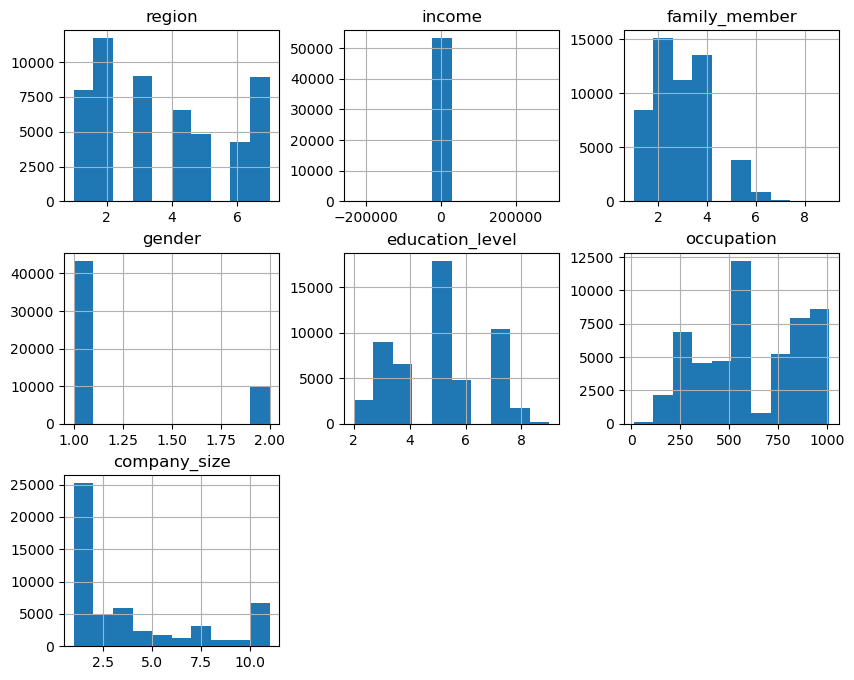

In [43]:
pre_i_df.hist(figsize=(10, 8))

In [45]:
pre_i_df.income.describe().T

count     53244.000000
mean       4551.756064
std        4472.682505
min     -232174.000000
25%        2042.750000
50%        3746.000000
75%        5992.250000
max      290062.000000
Name: income, dtype: float64

iloc > 실제 인덱스  
loc > 기록되어있는 인덱스

In [ ]:
from sklearn.linear_model import LinearRegressionnear
from sklearn.model_selection import train_test_split 

In [ ]:
np.pre_i_df.lognp(